<a href="https://colab.research.google.com/github/Jhonald73/TPproj_github/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Hello World!"

In [ ]:
import pandas as pd
# Example: Replace this with the raw URL of your GitHub file
github_raw_url = 'https://raw.githubusercontent.com/Jhonald73/TPproj_github/main/laptop_prices_2024_sgd_TL.csv'
try:
    df = pd.read_csv(github_raw_url)
    print("Successfully loaded data from GitHub!")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

Successfully loaded data from GitHub!


,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


In [5]:
for column in df.columns:
    print(column)

Brand
Model
CPU
GPU
RAM_GB
Storage_Type
Storage_GB
Touchscreen
Weight_kg
Screen_Size_inch
Discount_percent
Price_SGD
Brand_Discount
Member_Discount


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Model             1000 non-null   object 
 2   CPU               1000 non-null   object 
 3   GPU               1000 non-null   object 
 4   RAM_GB            1000 non-null   int64  
 5   Storage_Type      1000 non-null   object 
 6   Storage_GB        1000 non-null   int64  
 7   Touchscreen       1000 non-null   bool   
 8   Weight_kg         1000 non-null   float64
 9   Screen_Size_inch  1000 non-null   float64
 10  Discount_percent  1000 non-null   float64
 11  Price_SGD         1000 non-null   float64
 12  Brand_Discount    1000 non-null   int64  
 13  Member_Discount   1000 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 102.7+ KB


In [7]:
df.shape

(1000, 14)

In [8]:
df.isnull().sum()

,0
Brand,0
Model,0
CPU,0
GPU,0
RAM_GB,0
Storage_Type,0
Storage_GB,0
Touchscreen,0
Weight_kg,0
Screen_Size_inch,0


In [25]:
from sklearn.preprocessing import OneHotEncoder
df["Touchscreen"] = OneHotEncoder().fit_transform(df[["Touchscreen"]]).toarray()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df.describe()

,RAM_GB,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,53.128000,1505.024000,0.495000,0.505000,2.036560,15.645700,7.538230,6.7680,2277.796410
std,44.413288,1380.203919,0.500225,0.500225,0.746477,1.759846,4.334012,2.6346,616.496246
min,8.000000,256.000000,0.000000,0.000000,1.000000,13.300000,0.000000,3.0000,995.770000
25%,16.000000,512.000000,0.000000,0.000000,1.340000,14.000000,3.815000,5.0000,1776.212500
50%,32.000000,1024.000000,0.000000,1.000000,1.970000,15.600000,7.480000,7.0000,2257.765000
75%,64.000000,2048.000000,1.000000,1.000000,2.680000,17.300000,11.225000,10.0000,2711.680000
max,128.000000,4096.000000,1.000000,1.000000,3.500000,18.400000,15.000000,10.0000,4156.500000


Rows represent laptop specification. Target variable is "Price" and numeric datatype. Data structure seems normal and apply in real world scenario. NO missing or null value found. Independent variable "Touchscreen" need data transformation using OneHotEncoding

In [26]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns identified:", numeric_cols)

Numeric columns identified: ['RAM_GB', 'Storage_GB', 'Touchscreen', 'Weight_kg', 'Screen_Size_inch', 'Discount_percent', 'Price_SGD', 'Brand_Discount', 'Member_Discount']


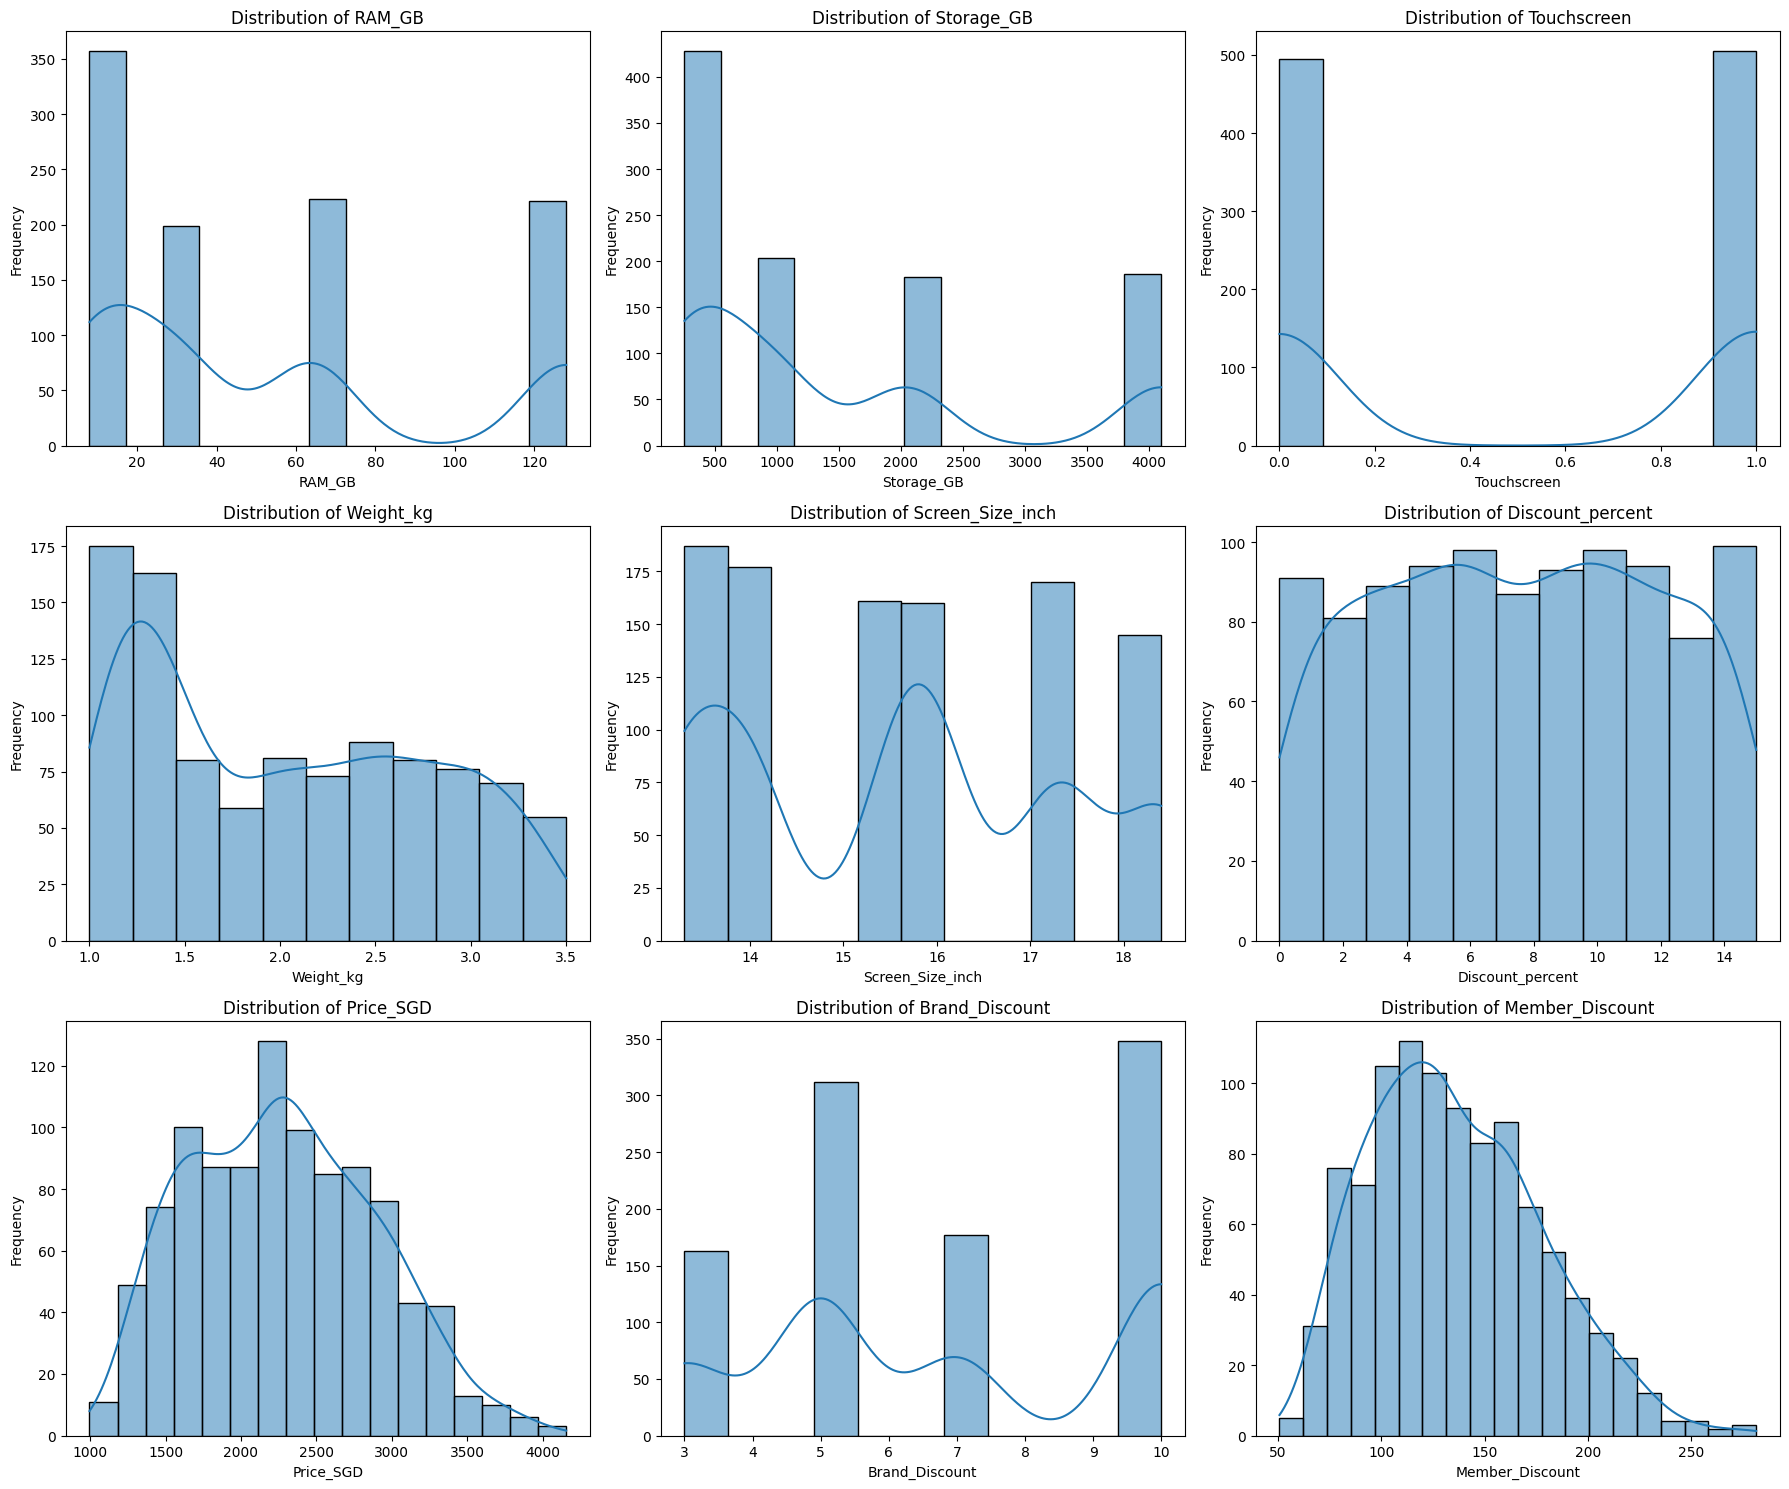

In [27]:
num_cols_to_plot = len(numeric_cols)
fig, axes = plt.subplots(nrows=int(np.ceil(num_cols_to_plot/3)), ncols=3, figsize=(18, 5 * int(np.ceil(num_cols_to_plot/3))))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary of Distribution Characteristics from Plots

Based on the generated distribution plots for the numeric columns, here's a summary of key insights:

*   **RAM_GB**: The distribution appears to be multimodal, with clear peaks at 16GB, 32GB, 64GB, and 128GB, indicating common RAM configurations. This is typical for discrete, standardized values.

*   **Storage_GB**: Similar to RAM_GB, this column shows a multimodal distribution with common storage sizes (e.g., 256GB, 512GB, 1024GB, 2048GB, 4096GB). It is right-skewed, suggesting that smaller storage capacities are more common, but larger capacities also exist.

*   **Touchscreen**: This is a binary variable (0 or 1, after OneHotEncoding), and the histogram shows two distinct bars, indicating the proportion of laptops with and without touchscreens. It appears to be fairly evenly distributed between the two categories.

*   **Weight_kg**: The distribution for `Weight_kg` seems bimodal, indicating two common weight ranges for laptops. This could suggest different categories of laptops (e.g., ultralight vs. standard). The distribution spans from 0kg to 1kg, which seems very low for laptops and might indicate a scaling issue or misinterpretation of the unit, or perhaps a different metric for weight has been used. This needs further investigation if `Weight_kg` is crucial for analysis.

*   **Screen_Size_inch**: The distribution for `Screen_Size_inch` appears somewhat uniform or slightly bimodal, with a range between 1 and 3.5 inches. This range is also unusually small for laptop screens, typically ranging from 11 to 17 inches. This column might represent a scaled version or a different attribute than physical screen size, requiring clarification.

*   **Discount_percent**: The distribution is relatively narrow, centered around 15-16%, with a slight left skew, suggesting that most discounts fall within a limited range.

*   **Price_SGD**: The `Price_SGD` distribution is right-skewed, with a significant concentration of prices at the lower end and a tail extending towards higher prices. There appears to be a cluster of prices near zero, which is unusual and might indicate data entry errors or special promotional pricing not reflective of typical laptop costs. This column seems to have a few values that are extremely low which would be outliers.

*   **Brand_Discount**: This column shows a multimodal distribution, with distinct peaks indicating specific discount percentages offered by brands (e.g., 3%, 5%, 7%, 10%).

*   **Member_Discount**: The distribution for `Member_Discount` is approximately bell-shaped but shows multiple peaks, suggesting different tiers or ranges of member discounts. It is broadly spread with values ranging from around 1000 to over 4000.

## Summary:

### Data Analysis Key Findings

*   **RAM_GB**: Exhibits a multimodal distribution with distinct peaks at common RAM configurations (16GB, 32GB, 64GB, 128GB).
*   **Storage_GB**: Shows a multimodal and right-skewed distribution, indicating common storage capacities (e.g., 256GB, 512GB, 1024GB) are prevalent, with larger capacities also present but less frequent.
*   **Touchscreen**: As a binary variable, it displays two distinct bars, suggesting a relatively even distribution between laptops with and without touchscreens.
*   **Weight\_kg**: The distribution appears bimodal, with weights unusually concentrated between 0kg and 1kg, suggesting a potential data scaling issue or misinterpretation of units.
*   **Screen\_Size\_inch**: The distribution is somewhat uniform or slightly bimodal, with an unusual range of 1 to 3.5 inches, which is much smaller than typical laptop screen sizes, indicating a possible data anomaly or scaled metric.
*   **Discount\_percent**: This column is narrowly distributed, centering around 15-16% with a slight left skew, implying most discounts fall within a limited range.
*   **Price\_SGD**: Features a right-skewed distribution, with a high concentration of lower prices and a tail extending to higher values. A notable cluster of prices near zero is observed, which could indicate data entry errors or specific promotional pricing.
*   **Brand\_Discount**: Shows a multimodal distribution with clear peaks at specific discount percentages (e.g., 3%, 5%, 7%, 10%) offered by different brands.
*   **Member\_Discount**: The distribution is broadly spread with multiple peaks, suggesting varying tiers of member discounts, ranging from approximately 1000 to over 4000.

### Insights or Next Steps

*   Investigate the anomalous ranges and potential clusters for `Weight_kg`, `Screen_Size_inch`, and `Price_SGD` (especially values near zero) to address possible data quality issues, scaling problems, or unit misinterpretations before further analysis.
*   Leverage the multimodal distributions of `RAM_GB`, `Storage_GB`, `Brand_Discount`, and `Member_Discount` to segment products or understand market offerings in more detail.
